<a href="https://colab.research.google.com/github/Farmhouse121/Adventures-in-Financial-Data-Science/blob/main/Martingales_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

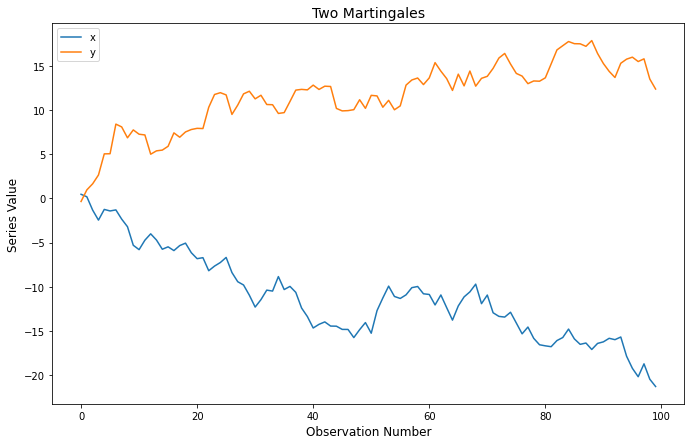

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl ; golden_ratio=(1e0+np.sqrt(5e0))/2e0 ; figure_size=(7*golden_ratio,7)

npts=100
np.random.seed(123456) # so the plot is reliable, and this is not a "mined" seed, as is clear from it's value
df=pd.DataFrame({'x':np.random.normal(size=npts),'y':np.random.normal(size=npts)})

for column in df:
    df[column]=df[column].cumsum()

figure,plot=pl.subplots(figsize=figure_size)
plot=df.plot(ax=plot)
plot.set_xlabel("Observation Number",fontsize=12)
plot.set_ylabel("Series Value",fontsize=12)
plot.set_title("Two Martingales",fontsize=14);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           6.63e-27
Time:                        17:58:11   Log-Likelihood:                -216.64
No. Observations:                 100   AIC:                             437.3
Df Residuals:                      98   BIC:                             442.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3311      0.530      8.167      0.0

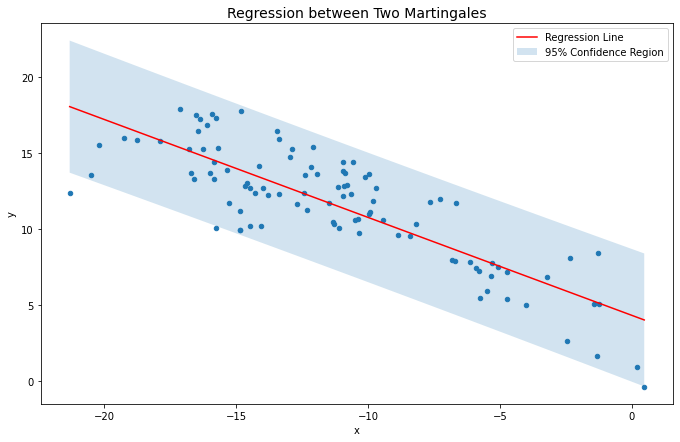

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
alpha=0.05 # set alpha_critical to 5%
fit=ols("y ~ x",df).fit() # do OLS regression
df['yhat']=fit.fittedvalues # get the fit
print(fit.summary()) # print the regression summary

figure,plot=pl.subplots(figsize=figure_size)
df.plot.scatter("x","y",ax=plot)
x,y,yhat=tuple(map(lambda c:df[c].tolist(),list(df)))
sig,crl,cru,=wls_prediction_std(fit,alpha=alpha) # get the confidence regions with given alpha
x,y,yhat,crl,cru=tuple(zip(*list(sorted(zip(x,y,yhat,crl,cru),key=lambda a:a[0])))) # sort all values by x
plot.plot(x,yhat,'r-',label='Regression Line')
plot.fill_between(x,crl,cru,alpha=0.2,label='%.0f%% Confidence Region' % (1e2-1e2*alpha))
plot.set_title("Regression between Two Martingales",fontsize=14)
plot.legend(loc="best");

Mean of F Statistics = 55.68 [1.02 expected]


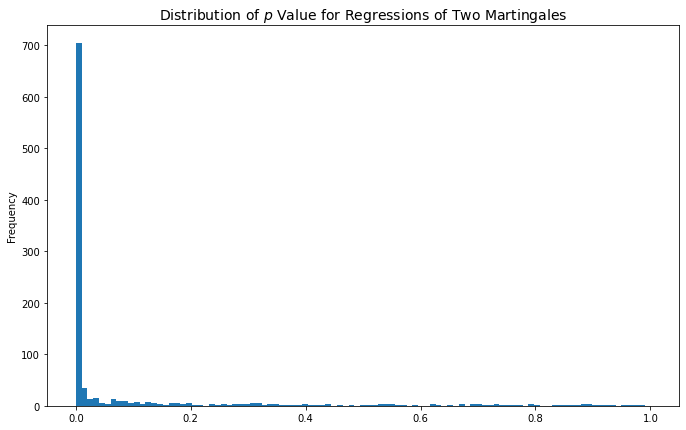

In [ ]:
f_stats=pd.DataFrame({'F':[],'p':[]})

for i in range(1000):
    df=pd.DataFrame({'x':np.random.normal(size=npts),'y':np.random.normal(size=npts)})

    for column in df:
        df[column]=df[column].cumsum()

    fit=ols("y ~ x",df).fit()
    f_stats=f_stats.append(pd.DataFrame({'F':[fit.fvalue],'p':[fit.f_pvalue]}))

print("Mean of F Statistics = %.2f [%.2f expected]" % (f_stats["F"].mean(),(npts-len(fit.params))/(npts-len(fit.params)-2)))

figure,plot=pl.subplots(figsize=figure_size)
f_stats['p'].plot.hist(ax=plot,bins=np.linspace(0,1,100))
plot.set_title("Distribution of $p$ Value for Regressions of Two Martingales",fontsize=14);

In [ ]:
for column in df:
     df["Δ"+column]=df[column].diff()

fit=ols('Δy ~ Δx',df).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                     Δy   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.722
Date:                Tue, 16 Nov 2021   Prob (F-statistic):              0.102
Time:                        19:30:04   Log-Likelihood:                -123.98
No. Observations:                  99   AIC:                             252.0
Df Residuals:                      97   BIC:                             257.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0662      0.086      0.770      0.4